In [1]:
import iris
import numpy as np
import matplotlib.colors as mplc
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import datetime
from iris.time import PartialDateTime
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#loading in 1 hourly mean OLR files as iris cubes
olr_1h_model_filename = '/data/users/hgilmour/olr/olr_1h/1998/olr_merge_1week.nc' #CPM
olr_1h_model_cube = iris.load(olr_1h_model_filename)

olr_1h_obs_filename = '/data/users/hgilmour/obs/GPM_MERGIR/annual_files_hrly/hourly_merg_1998.nc4' #GPM_MERGIR obs
olr_1h_obs_cube = iris.load(olr_1h_obs_filename)

/var/tmp/ipykernel_89733/1177976326.py:3: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  olr_1h_model_cube = iris.load(olr_1h_model_filename)


In [3]:
#subsetting each cube to just get the first week
pdt1 = PartialDateTime(year = 1998, month = 1, day = 1)
pdt2 = PartialDateTime(year = 1998, month = 1, day = 8)
date_range = iris.Constraint(time=lambda cell: pdt1 <= cell.point < pdt2)

olr_model_extract = olr_1h_model_cube[0].extract(date_range)
olr_obs_extract = olr_1h_obs_cube[0]

In [4]:
#combined pdf plots:
#===================
array_model = np.array([])
for x in range(0,8):#over 9 timestamps to total 1 day
     extract_model = olr_model_extract[x,:,:].data
     myArray = extract_model.ravel()
     array_model = np.concatenate([array_model, myArray],axis=0)

array_obs = np.array([])
for x in range (0,8):#over 9 timestamps to total 1 day
	extract_obs = olr_obs_extract[x,:,:].data
	myArray1 = extract_obs.ravel()
	array_obs = np.concatenate([array_obs, myArray1],axis=0)


array_model_2 = np.array([])
for x in range(9,17): #2nd day of 1998
     extract_model_2 = olr_model_extract[x,:,:].data
     myArray_2  = extract_model_2.ravel()
     array_model_2= np.concatenate([array_model_2, myArray_2],axis=0)

array_obs_2= np.array([])
for x in range (9,17):#2nd day of 1998
	extract_obs_2= olr_obs_extract[x,:,:].data
	myArray_obs_2 = extract_obs_2.ravel()
	array_obs_2 = np.concatenate([array_obs_2, myArray_obs_2],axis=0)


array_model_3= np.array([])
for x in range(18, 26): #3rd day of 1998
     extract_model_3= olr_model_extract[x,:,:].data
     myArray_3= extract_model_3.ravel()
     array_model_3= np.concatenate([array_model_3, myArray_3],axis=0)

array_obs_3= np.array([])
for x in range (18,26):#3rd day of 1998
	extract_obs_3 = olr_obs_extract[x,:,:].data
	myArray_obs_3= extract_obs_3.ravel()
	array_obs_3= np.concatenate([array_obs_3, myArray_obs_3],axis=0)

#convert model olr values to brightness temp (just stefan-boltmann conversion):
array_model_Tb = (array_model/(5.67*10**-8))**(1/4)	
array_model_2_Tb = (array_model_2/(5.67*10**-8))**(1/4)
array_model_3_Tb = (array_model_3/(5.67*10**-8))**(1/4)

In [5]:
#using ALTERNATIVE conversion from PyFLEXTRKR:
# # (1984) as given in Yang and Slingo (2001)
    # Tf = tb(a+b*Tb) where a = 1.228 and b = -1.106e-3 K^-1
    # OLR = sigma*Tf^4 
    # where sigma = Stefan-Boltzmann constant = 5.67x10^-8 W m^-2 K^-4
a = 1.228
b = -1.106e-3
sigma = 5.67e-8 # W m^-2 K^-4

tf = (array_model/sigma)**0.25
tb = (-a + np.sqrt(a**2 + 4*b*tf))/(2*b)

tf_2 = (array_model_2/sigma)**0.25
tb_2 = (-a + np.sqrt(a**2 + 4*b*tf_2))/(2*b)

tf_3 = (array_model_3/sigma)**0.25
tb_3 = (-a + np.sqrt(a**2 + 4*b*tf_3))/(2*b)

/var/tmp/ipykernel_89733/2079447624.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/tmp/ipykernel_89733/2079447624.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(array_model_Tb,label='SA-CPRCM (Stefan-Boltzmann)',color='darkblue')
/var/tmp/ipykernel_89733/2079447624.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ada

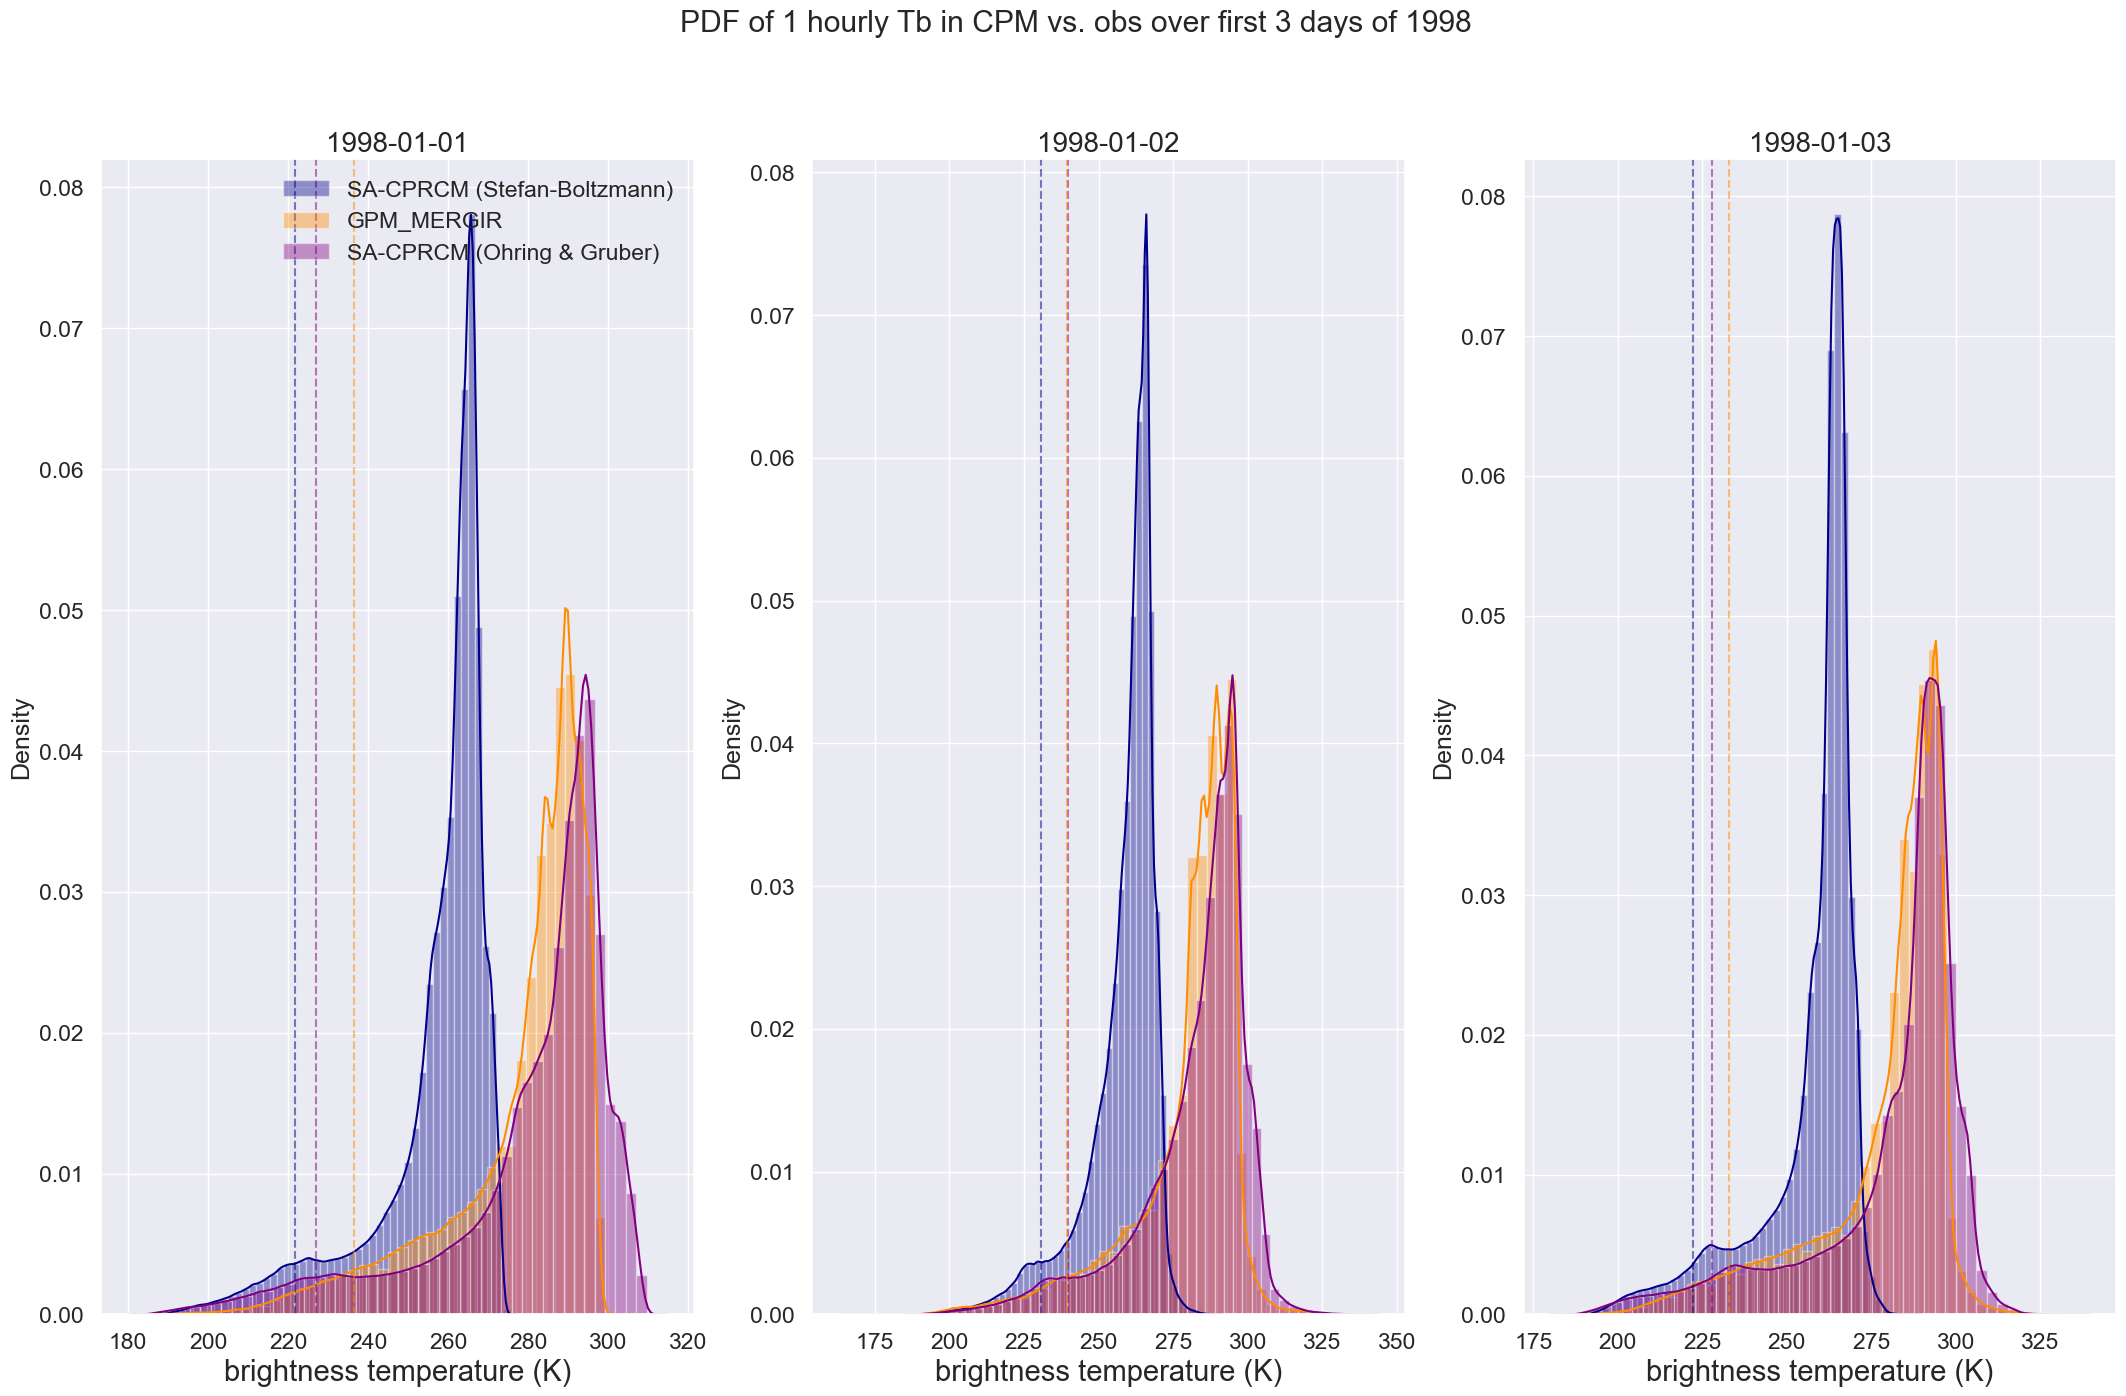

In [7]:
#subplots
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 21,'xtick.labelsize' : 14,'ytick.labelsize' : 14})
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(26,15))
plt.subplots_adjust(wspace=0.2)
plt.suptitle('PDF of 1 hourly Tb in CPM vs. obs over first 3 days of 1998')

ax1 = plt.subplot(131)
sns.distplot(array_model_Tb,label='SA-CPRCM (Stefan-Boltzmann)',color='darkblue')
sns.distplot((array_obs[array_obs >= 0]),label='GPM_MERGIR',color='darkorange')
sns.distplot(tb,label='SA-CPRCM (Ohring & Gruber)',color='purple')
 #(array_obs[array_obs >= 0]) is required as the observational dataset seems to include some values that go down as far as -9999. This skewed the distribution, so I have specified to plot only values in the array that are greater than or equal to 0
ax1.axvline(np.percentile(array_model_Tb,5),color='darkblue',alpha=0.5,linestyle='dashed')
ax1.axvline(np.percentile(tb,5),color='purple',alpha=0.5,linestyle='dashed')
ax1.axvline(np.percentile((array_obs[array_obs >= 0]),5),color='darkorange',alpha=0.5,linestyle='dashed')
plt.legend(loc='best')
plt.xlabel('brightness temperature (K)',fontsize=21)
plt.title('1998-01-01',fontsize=20)

ax2 = plt.subplot(132)
sns.distplot(array_model_2_Tb,label='SA-CPRCM',color='darkblue')
sns.distplot((array_obs_2[array_obs_2 >= 0]),label='GPM_MERGIR',color='darkorange')
sns.distplot(tb_2,label='SA-CPRCM (robust Tb)',color='purple')
ax2.axvline(np.percentile(array_model_2_Tb,5),color='darkblue',alpha=0.5,linestyle='dashed')
ax2.axvline(np.percentile(tb_2,5),color='purple',alpha=0.5,linestyle='dashed')
ax2.axvline(np.percentile((array_obs_2[array_obs_2 >= 0]),5),color='darkorange',alpha=0.5,linestyle='dashed')
plt.title('1998-01-02',fontsize=20)
plt.xlabel('brightness temperature (K)',fontsize=21)

ax3 = plt.subplot(133)
sns.distplot(array_model_3_Tb,label='SA-CPRCM',color='darkblue')
sns.distplot((array_obs_3[array_obs_3 >= 0]),label='GPM_MERGIR',color='darkorange')
sns.distplot(tb_3,label='SA-CPRCM (robust Tb)',color='purple')
ax3.axvline(np.percentile(array_model_3_Tb,5),color='darkblue',alpha=0.5,linestyle='dashed')
ax3.axvline(np.percentile(tb_3,5),color='purple',alpha=0.5,linestyle='dashed')
ax3.axvline(np.percentile((array_obs_3[array_obs_3 >= 0]),5),color='darkorange',alpha=0.5,linestyle='dashed')
plt.title('1998-01-03',fontsize=20)
plt.xlabel('brightness temperature (K)',fontsize=21)
plt.savefig('Plot/olr_pdfs/olr_tb_conversion_pdf.png')
